In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import KID_S21 as S21
import pandas as pd
import glob 

import matplotlibcolors
plt.style.use('matplotlibrc')

%matplotlib widget

In [2]:
# dir = r'Z:\KIDonSun\experiments\Entropy ADR\LT361w2chip4_BF_20241010\S21\Power/'
# df = S21.loop_over_S21_files(dir, kid=None, pread=116)
# display(df)

In [3]:
def fit(x, a, b):
    return a*x**(-2)+b 

In [4]:
f0s = np.array(df['f0'])
Qs = np.array(df['Ql'])
Qis = np.array(df['Qi'])
Qcs = np.array(df['Qc'])

min_df = 0.002
df0s = f0s[1:] - f0s[:-1]
df_mask = np.zeros(f0s.shape, dtype=bool)
too_close = df0s < min_df
too_close_mask = np.hstack((False, too_close)) + np.hstack((too_close, False))
print(np.sum(too_close_mask))
popt, pcov = curve_fit(fit, f0s[~too_close_mask], Qcs[~too_close_mask])
f0s_fit = np.linspace(f0s[~too_close_mask].min(), f0s[~too_close_mask].max(), 100)

fig, ax = plt.subplots()
ax.set_title('LT361w2chip4')
ax.set_yscale('log')
ax.scatter(f0s[~too_close_mask], Qs[~too_close_mask], label='Q')
ax.scatter(f0s[~too_close_mask], Qis[~too_close_mask], label='Qis')
ax.scatter(f0s[~too_close_mask], Qcs[~too_close_mask], label='Qcs')
ax.plot(f0s_fit, fit(f0s_fit, *popt), label='fit $y=a/x^2 +b$', c='k', ls='--')
ax.set_xlim(4,9)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(1e4, 2e6)
ax.set_ylabel('Q')
ax.legend()
print(*popt)

NameError: name 'df' is not defined

In [ ]:
couplers = np.load(r'C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\Mappings\LT361w2chip9\LT361_4-8GHz_1024px_couplers.npy')
f0s_design = np.load(r'C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\Mappings\LT361w2chip9\LT361_4-8GHz_1024px_F0s.npy')*1e-9
fig, ax = plt.subplots()
ax.scatter(f0s_design, couplers)
ax.set_xlim(4,9)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(0, 100)
ax.set_ylabel('Length coupler (um)')

In [30]:
f0s = np.array(df['f0'])
Qs = np.array(df['Ql'])
Qis = np.array(df['Qi'])
Qcs = np.array(df['Qc'])
phi = np.array(df['phi'])
Q_master = np.stack((f0s, Qs, Qis, Qcs, phi), axis=1)
np.savetxt('LT361w2chip4_Qs.txt', Q_master, header='f0 Ql Qi Qc', fmt='%s', delimiter='\t')

In [ ]:
min_df = 0.002
df0s = f0s[1:] - f0s[:-1]
df_mask = np.zeros(f0s.shape, dtype=bool)
too_close = df0s < min_df
too_close_mask = np.hstack((False, too_close)) + np.hstack((too_close, False))
print(np.sum(too_close_mask))
popt, pcov = curve_fit(fit, f0s[~too_close_mask], Qcs[~too_close_mask])
f0s_fit = np.linspace(f0s[~too_close_mask].min(), f0s[~too_close_mask].max(), 100)

fig, ax = plt.subplots()
ax.set_title('LT361w2chip4')
ax.set_yscale('log')
ax.scatter(f0s[~too_close_mask], Qs[~too_close_mask], label='Q')
ax.scatter(f0s[~too_close_mask], Qcs[~too_close_mask], label='Qc')
ax.scatter(f0s[~too_close_mask], Qis[~too_close_mask], label='Qi')
# ax.plot(f0s_fit, fit(f0s_fit, *popt), label='fit $y=a/x^2 +b$', c='k', ls='--')
ax.set_xlim(4,9)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(1e4,2e6)
ax.set_ylabel('Q')
ax.legend()
print(*popt)
couplers = np.load(r'C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\Mappings\LT361w2chip9\LT361_4-8GHz_1024px_couplers.npy')
f0s_design = np.load(r'C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\Mappings\LT361w2chip9\LT361_4-8GHz_1024px_F0s.npy')*1e-9


In [ ]:
fig, ax = plt.subplots()
ax.scatter(f0s_design, couplers)
ax.set_xlim(4,9)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(0, 100)
ax.set_ylabel('Length coupler (um)')

In [6]:
master = np.loadtxt('LT361w2chip4_master.txt', skiprows=1, delimiter=',')
Qs = np.loadtxt('LT361w2chip4_Qs.txt', skiprows=1, delimiter='\t')
f0_mapped = master[:, 6]
f0_meas = f0_mapped
f0_Q = Qs[:, 0]
Ql = Qs[:, 1]
Qc = Qs[:, 3]
Qi = Qs[:, 2]
phi = Qs[:, 4]

min_df = 0.001
df0s = f0_Q[1:] - f0_Q[:-1]
df_mask = np.zeros(f0_Q.shape, dtype=bool)
too_close = df0s < min_df
too_close_mask = np.hstack((False, too_close)) + np.hstack((too_close, False))

Qi_mask = (Qi > 1e5)  & (Qi < 2e6)
Qc_mask = Qc < 1.5e5
mask = Qi_mask & Qc_mask & ~too_close_mask

Qs[~mask] = np.nan
f0_Q = Qs[:, 0]
Ql = Qs[:, 1]
Qc = Qs[:, 3]
Qi = Qs[:, 2]
phi = Qs[:, 4]

42999.116202484125 14711.71806554876


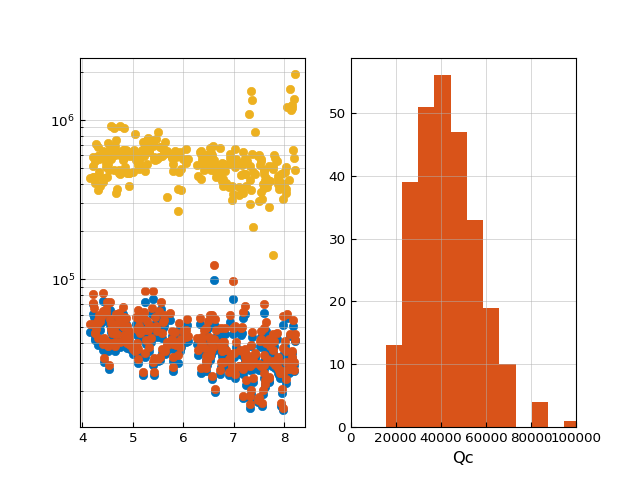

In [7]:
fig, axes = plt.subplot_mosaic('ab')
ax = axes['a']
ax.scatter(f0_Q, Ql)
ax.scatter(f0_Q, Qc)
ax.scatter(f0_Q, Qi)
Qs = np.stack((f0_Q, Ql, Qi, Qc, phi), axis=1)
ax.set_yscale('log')
ax = axes['b']
_ = ax.hist(Qc, facecolor='o', bins=15)
ax.set_xlim(0, 100000)
ax.set_xlabel('Qc')
print(np.nanmean(Qc), np.nanstd(Qc))
# ax.hist(Qi)

# ax.set_ylim(1e4, 1e6)

In [8]:
nr = len(f0_mapped)
f0_dark = f0_Q
tones = np.empty(nr)
tones[:] = np.nan
Qs_sorted = np.empty((nr, 5))
Qs_sorted[:] = np.nan
idxs = np.empty(nr)
idxs[:] = np.nan
for id, f0 in enumerate(f0_mapped):
    if ~np.isnan(f0):
        closest =  np.nanargmin(np.abs(f0 - f0_dark))
        if ~np.isnan(f0_dark[closest]):
            tone = f0_dark[closest]
            Q = Qs[closest]
            if closest in idxs:
                idx_location = np.where(idxs == closest)[0]
                if len(idx_location) == 1:
                    prev_id = idx_location[0]
                    prev_f0 = f0_mapped[prev_id]
                    curr_diff = np.abs(f0 - tone)
                    prev_diff = np.abs(prev_f0 - tone)
                    if curr_diff < prev_diff:
                        tones[prev_id] = np.nan
                        Qs_sorted[prev_id] = np.nan
                        idxs[prev_id] = np.nan
                    else:
                        tone = np.nan
                        Q = np.nan
                        closest = np.nan
                else:
                    print('more than one match')
                    tone = np.nan
                    Q = np.nan
                    closest = np.nan
            else:
                pass
        else:
            tone = np.nan
            Q = np.nan
            closest = np.nan
    else:
        tone = np.nan
        Q = np.nan
        closest = np.nan
    tones[id] = tone
    Qs_sorted[id] = Q
    idxs[id] = closest

f0 = Qs_sorted[:, 0]
Ql = Qs_sorted[:, 1]
Qc = Qs_sorted[:, 3]
Qi = Qs_sorted[:, 2]
phi = Qs_sorted[:, 4]



In [10]:
extra_data = {
    'KID': np.full(f0_meas.shape, '', dtype=object),
    'f0_Q': np.full(f0_meas.shape, np.nan),
    'Ql': np.full(f0_meas.shape, np.nan),
    'Qc': np.full(f0_meas.shape, np.nan),
    'Qi': np.full(f0_meas.shape, np.nan),
    'dw': np.full(f0_meas.shape, np.nan),
}
gebruikt = np.full(f0_meas.shape, False)

# -- 4. Match alleen geldige f0_meas én als f0_Q > f0_meas --
tolerance = 0.001  # GHz

for i, row in enumerate(Qs):
    if ~np.isnan(row[0]):
        f_q = row[0]
        verschil = np.abs(f0_meas - f_q)

    # Vind kandidaten: nog niet gebruikt, niet te dicht, binnen tolerantie, én f0 < f_q
    kandidaten = np.where(
        (~gebruikt)
    )[0]

    if len(kandidaten) == 0:
        continue

    # Kies dichtstbijzijnde geldige kandidaat
    idx = kandidaten[np.nanargmin(verschil[kandidaten])]

    # Vul extra_data
    extra_data['KID'][idx] = i
    extra_data['f0_Q'][idx] = f_q
    extra_data['Ql'][idx] = row[1]
    extra_data['Qc'][idx] = row[3]
    extra_data['Qi'][idx] = row[2] 
    # extra_data['dw'][idx] = row['dw']

    gebruikt[idx] = True

# -- 5. Combineer alles --
extended_master_array = np.column_stack((
    master,
    extra_data['KID'],
    extra_data['f0_Q'],
    extra_data['Ql'],
    extra_data['Qc'],
    extra_data['Qi'],
    extra_data['dw']
))

colnames = ['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'f0_meas','col7','col8','col9', 'KID', 'f0_Q', 'Ql', 'Qc', 'Qi','dw']
#colnames = ['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'f0_meas', 'KID', 'f0_Q', 'Ql', 'Qc', 'Qi', 'dw']
df_extended = pd.DataFrame(extended_master_array, columns=colnames)

# Preview
#print(df_extended.head())
display(df_extended[['KID', 'col7', 'f0_Q', 'Ql', 'Qc', 'Qi','dw']])
print(f0_meas)

,KID,col7,f0_Q,Ql,Qc,Qi,dw
0,0,4.15617,4.156188,46760.452981,52419.10898,433166.688599,NaN
1,1,4.202063,4.202044,61096.18026,70953.260136,439782.696878,NaN
2,2,4.207842,4.207819,69763.937118,80749.554701,512798.376053,NaN
3,3,4.219745,4.219737,48140.303422,52457.631696,584928.026383,NaN
4,,4.993571,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
395,385,8.191332,8.189794,26582.805495,27113.389292,1358409.281907,NaN
396,386,8.198675,8.196706,28984.025068,30506.651071,580710.915026,NaN
397,387,8.216365,8.214824,41086.40162,41977.021801,1936498.649644,NaN
398,388,8.223389,8.220759,41817.447545,45722.263818,489648.740289,NaN


[4.15617  4.202063 4.207842 4.219745      nan 4.238052 4.24708  4.252953
 4.264856 4.276415 4.281007 4.303282 4.308499 4.317184 4.334366 4.339115
 4.349018 4.312685 4.370792 4.348674 4.354391 4.40044  4.408125 4.416247
 4.421027 4.431742 4.44049  4.450705 4.463983 4.469825 4.476323 4.498503
 4.495817 4.503814 4.466263 4.529744 4.544927 4.559047 4.565889 4.540553
 4.546551 4.596973 4.60294  4.612156 4.618623 4.629401 4.63768  4.646458
 4.659017 4.663391 4.670576 4.621997 4.691413 4.698224 4.723122      nan
 4.73768  4.753863 4.754894 4.729308 4.733213 4.782073 4.79635  4.800099
 4.810783 4.822873 4.826653 4.834869 4.781542 4.84799  4.858237 4.879075
 4.881449 4.89079  4.915845 4.916251 4.931777 4.943742 4.950022 4.92278
 4.92781  4.980762 4.991853 4.993571 5.002537 4.950834 5.0205   5.033902
 5.045899 5.04518  5.055177 5.078108 5.07464  5.089104 5.102194 5.113066
 5.12225  5.135153 5.142994 5.115284 5.116502 5.16605  5.110785 5.178921
 5.188324 5.202976 5.2046   5.220658 5.237309 5.2343

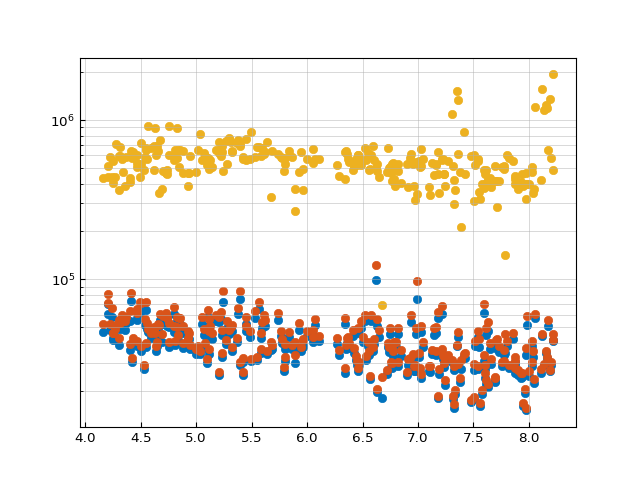

In [74]:
fig, ax = plt.subplots()
ax.scatter(f0, Ql)
ax.scatter(f0, Qc)
ax.scatter(f0, Qi)
ax.set_yscale('log')

In [80]:
array = np.loadtxt('LT361w2chip4_Q-master.txt', delimiter=',', skiprows=1)
array[:, 1:6] = Qs_sorted
headers = "idx, f0, Ql, Qi, Qc, phi, f0, Ql, Qi, Qc, phi"
# np.savetxt('LT361w2chip4_Q-master.txt', array, header=headers, delimiter=',')


mean res:  -1850.5714623649628 std res:  9602.746330820544


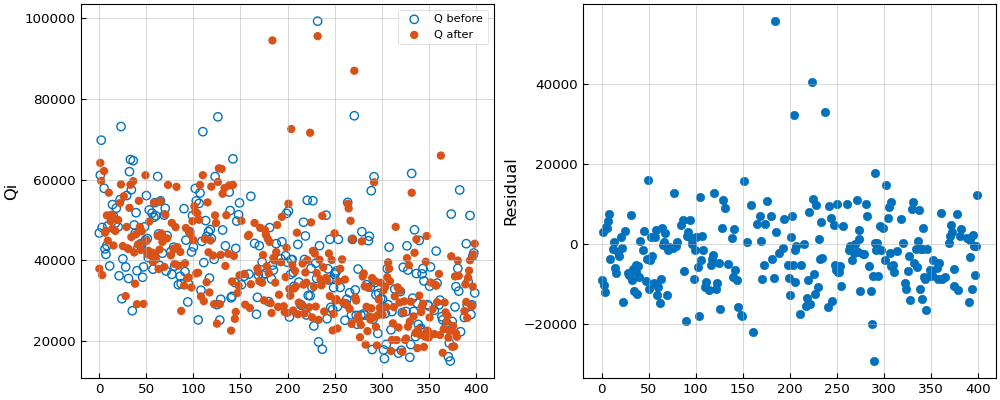

In [88]:
Q_before = array[:, 2]
Q_after = array[:, 7]
res = Q_after - Q_before
frac_res = res / Q_before
fig, axes = plt.subplot_mosaic('ab', figsize=(10, 4), layout='constrained')
ax = axes['a']
ax.scatter(array[:, 0], Q_before, label='Q before', facecolor='None', edgecolor='b', linewidth=1)
ax.scatter(array[:, 0], Q_after, label='Q after', facecolor='o', edgecolor='None')
ax.legend()
ax.set_ylabel('Qi')
ax.set_yscale('linear')
ax = axes['b']
ax.scatter(array[:, 0, ], res, label='Q after - Q before')
ax.set_ylabel('Residual')
print('mean res: ', np.nanmean(res), 'std res: ', np.nanstd(res))

In [ ]:
mask = ~np.isnan(array[:, 2]) & ~np.isnan(array[:, 7])
np.corrcoef(array[:, 2][mask], array[:, 7][mask])

In [ ]:
mask = ~np.isnan(array[:, 2]) & ~np.isnan(array[:, 5])
np.corrcoef(array[:, 2][mask], array[:, 5][mask])

In [ ]:
mask = ~np.isnan(array[:, 2]) & ~np.isnan(array[:, 3])
np.corrcoef(array[:, 2][mask], array[:, 3][mask])

In [ ]:
fig, ax = plt.subplots()
ax.scatter(f0, Ql)
ax.scatter(f0, Qc)
ax.scatter(f0, Qi)
fig, ax = plt.subplots()
ax.plot(f0_mapped)
ax.plot(f0_Q)
ax.plot(tones)
print(f0_Q[0], f0_mapped[0])
def fit(x, a, b):
    return a*x**(-2)+b


In [ ]:
fig, ax = plt.subplot_mosaic('abc', figsize=(8, 4), layout='constrained')
nanmask = np.isnan(Qc)
popt, pcov = curve_fit(fit, f0[~nanmask], Qc[~nanmask])
ax['a'].scatter(f0, Qc, label='Ql')
ax['a'].plot(f0, fit(f0, *popt), label='Ql', c='r')
Qc_corr = (Qc - fit(f0, *popt))
print(np.nanstd(Qc_corr))
ax['b'].scatter(f0, Qc_corr, label='Ql', c='r')
kid_id_board = np.ones((20, 20), dtype=int)
kid_id_board[master[:,1].astype(int), master[:,2].astype(int)] = master[:,0]
ax['c'].hist(Qc_corr, bins='auto', facecolor='o')
print(np.nanmean(Qc_corr), np.nanstd(Qc_corr))

In [ ]:

fig, ax = plt.subplot_mosaic('ab', figsize=(12,5), constrained_layout=True) 
im = ax['a'].imshow(Qc_corr[kid_id_board], vmin=-0.5, vmax=.5, origin='lower')
# im = ax['a'].imshow(Ql[kid_id_board], vmin=1e4, vmax=7e4, origin='lower')
# im = ax['a'].imshow(Qi[kid_id_board], vmin=2e5, vmax=6e5, origin='lower')
fig.colorbar(im, ax=ax['a'])
im = ax['b'].imshow(np.rad2deg(phi)[kid_id_board], origin='lower', vmin=-30, vmax=30)
fig.colorbar(im, ax=ax['b'])